# Detection and tracking of moving objects using background segmentation

1- Import opencv, numpy and sys packages.


In [ ]:
import cv2
import numpy as np
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2- Download video 'M6 Motorway Traffic.mp4'
 and load it to opencv.
(For windows, if an error occurred, include this cv2.ocl.setUseOpenCL(False))

In [ ]:
path = '/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.6 Computer Vision for Autonomous Cars/student material/M6 Motorway Traffic.mp4'
#cv2.ocl.setUseOpenCL(False)
opencv_ver = cv2.__version__.split('.')[0]
cap = cv2.VideoCapture(path)

In [ ]:
cap.get(5) #frame rate

25.00047607398629

3- Background segmentation using OpenCV function (see workshop 'Vision par ordinateur'). Do not forget to check opencv version in order to use the appropriate functions. 

In [ ]:
print(f"Current version of OpenCV is {opencv_ver}")
bg = cv2.createBackgroundSubtractorMOG2()

Current version of OpenCV is 4


4- Now loop each frame. Use a boolean parameter so if there’s nothing wrong this parameter is True otherwise it is False, and this parameter is False the frame will be none.

In [ ]:
while (cap.isOpened):
    ret, frame = cap.read() #2 variables, frame itself, ret = boolean
    count = 0
    if ret:
      count = count + 1
      pass

In [ ]:
from google.colab.patches import cv2_imshow

5- It time to apply background subtraction in order to separate background and foreground (moving object).

In [ ]:

cap = cv2.VideoCapture(path) #capture of video
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read() #
bgmask = bg.apply(frame)
cv2_imshow(bgmask)

6- Apply contours on moving object. Use OpenCV and do not forget to check opencv version in order to use the appropriate functions.

In [ ]:
(contours, hierarchy) = cv2.findContours(bgmask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

7- looping each contours, get bounding box from countour and than draw bounding box.


In [ ]:
for c in contours:
    if cv2.contourArea(c) < 800:
        continue
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
import matplotlib.pyplot as plt


8- Show the result and add exit key.


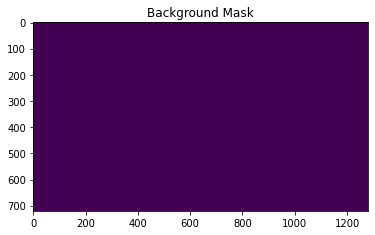

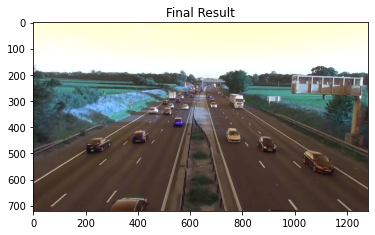

In [ ]:
plt.imshow(bgmask)
plt.title("Background Mask")
plt.show()
plt.imshow(frame)
plt.title("Final Result")
plt.show()
cap.release()
cv2.destroyAllWindows()

In [ ]:
## Applying the processing on video
cap.release()
cap = cv2.VideoCapture(path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while (cap.isOpened):
    ret, frame = cap.read() #ret is a boolean, true if a frame exists, false otherwise
    if ret:
      bgmask = bg.apply(frame)
      (contours, hierarchy) = cv2.findContours(bgmask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      for c in contours:
        if cv2.contourArea(c) < 800:
            continue
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    out.write(frame)
    

cap.release()
out.release()